Importação dos Pacotes

In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

Fazer a leitura da Base CSV

In [2]:
df = pd.read_csv('/content/dadosFundamentalistas2.csv')

In [3]:
df.head()

,ticker,data,DividendYield,P_Ativos,P_L,P_VP,ROA,ROE,ROIC,ValorDeMercado
0,ABEV3,2014-03-31,0.014985,4.195166,24.906204,6.621065,0.168439,0.289810,0.310674,2.655416e+11
1,ABEV3,2014-06-30,0.024365,3.920890,21.142900,5.887517,0.185447,0.284331,0.306026,2.469731e+11
2,ABEV3,2014-09-30,0.033915,3.866665,20.639561,5.772500,0.187342,0.285802,0.301588,2.518201e+11
3,ABEV3,2014-12-31,0.054679,3.560991,21.292202,5.886202,0.167244,0.283242,0.299076,2.566870e+11
4,ABEV3,2015-03-31,0.044770,3.861324,23.519944,6.288766,0.164172,0.276023,0.293347,2.899900e+11


In [4]:
df.tail()

,ticker,data,DividendYield,P_Ativos,P_L,P_VP,ROA,ROE,ROIC,ValorDeMercado
2974,YDUQ3,2022-09-30,0.008752,0.449592,-94.286174,1.470090,-0.004768,-0.014978,0.072103,4.466336e+09
2975,YDUQ3,2022-12-31,0.012436,0.347371,-53.970111,1.061950,-0.006436,-0.018731,0.081142,3.143435e+09
2976,YDUQ3,2023-03-31,0.017939,0.227610,149.887908,0.699740,0.001519,0.005782,0.088961,2.179070e+09
2977,YDUQ3,2023-06-30,0.000000,0.630069,55.602568,1.943535,0.011332,0.035973,0.097104,6.126124e+09
2978,YDUQ3,2023-09-30,0.013836,0.626806,32.655638,1.887923,0.019194,0.058597,0.103359,6.141579e+09


In [7]:
df['ticker'].nunique()

77

Criando a tabela usada na modelagem

In [8]:
abt_soma = df.groupby('ticker').sum(numeric_only=True)

In [9]:
abt_soma

,DividendYield,P_Ativos,P_L,P_VP,ROA,ROE,ROIC,ValorDeMercado
ticker,,,,,,,,
ABEV3,1.399657,111.954883,932.165580,182.798249,4.857191,8.183049,9.539780,1.059989e+13
ALPA4,1.305147,107.148964,1520.728375,183.166883,3.572114,6.112321,5.759972,4.643210e+11
AMER3,0.101826,1.929388,394.362780,5.572092,-0.684535,-2.049594,-0.573632,8.517271e+10
ASAI3,0.080081,7.501928,189.925600,73.122461,0.487118,4.783805,1.973406,2.316929e+11
B3SA3,0.956840,43.131966,584.701755,83.796368,1.847317,3.736935,2.536745,1.938318e+12
...,...,...,...,...,...,...,...,...
VALE3,3.226883,35.965801,1592.681964,75.965779,3.477220,7.156289,7.938348,1.297817e+13
VBBR3,0.450342,8.805712,207.845399,26.591769,0.391940,1.179138,0.772738,1.697056e+11
VIVT3,3.738691,32.674737,669.764067,51.419626,2.532100,3.974503,3.786052,3.981713e+12


In [10]:
abt_media = df.groupby('ticker').mean()

In [11]:
abt_media

,DividendYield,P_Ativos,P_L,P_VP,ROA,ROE,ROIC,ValorDeMercado
ticker,,,,,,,,
ABEV3,0.034991,2.798872,23.304139,4.569956,0.121430,0.204576,0.238495,2.649972e+11
ALPA4,0.025099,2.060557,29.244776,3.522440,0.068694,0.117545,0.110769,8.929250e+09
AMER3,0.025457,0.482347,98.590695,1.393023,-0.171134,-0.512399,-0.143408,2.129318e+10
ASAI3,0.007280,0.681993,17.265964,6.647496,0.044283,0.434891,0.179401,2.106299e+10
B3SA3,0.039868,1.797165,24.362573,3.491515,0.076972,0.155706,0.105698,8.076323e+10
...,...,...,...,...,...,...,...,...
VALE3,0.062055,0.691650,30.628499,1.460880,0.066870,0.137621,0.152661,2.495801e+11
VBBR3,0.056293,1.100714,25.980675,3.323971,0.048992,0.147392,0.096592,2.121319e+10
VIVT3,0.076300,0.666831,13.668654,1.049380,0.051676,0.081112,0.077266,8.125945e+10


In [ ]:
# criar a abt_mediana

In [12]:
abt_soma.isnull().sum()

DividendYield     0
P_Ativos          0
P_L               0
P_VP              0
ROA               0
ROE               0
ROIC              0
ValorDeMercado    0
dtype: int64

In [13]:
abt_media.isnull().sum()

DividendYield     0
P_Ativos          0
P_L               0
P_VP              0
ROA               0
ROE               0
ROIC              0
ValorDeMercado    0
dtype: int64

Normalizando o dado por Padronização e criando o df a ser usado no clustering

In [14]:
scale = StandardScaler()

In [15]:
scale

StandardScaler()

In [16]:
abt_soma_array = scale.fit_transform(abt_soma)
df_abt_soma = pd.DataFrame(data=abt_soma_array, columns=abt_soma.columns)
df_abt_soma.index = abt_soma.index

In [17]:
abt_media_array = scale.fit_transform(abt_media)
df_abt_media = pd.DataFrame(data=abt_media_array, columns=abt_media.columns)
df_abt_media.index = abt_media.index

In [18]:
df_abt_soma

,DividendYield,P_Ativos,P_L,P_VP,ROA,ROE,ROIC,ValorDeMercado
ticker,,,,,,,,
ABEV3,-0.043995,2.094059,-0.032476,0.737815,1.763010,0.715704,2.243072,3.240215
ALPA4,-0.121612,1.960557,0.118173,0.741336,1.032588,0.393724,0.749711,-0.347280
AMER3,-1.109836,-0.962309,-0.170133,-0.954614,-1.386842,-0.875382,-1.752629,-0.481480
ASAI3,-1.127694,-0.807511,-0.222461,-0.309539,-0.720888,0.187151,-0.746321,-0.429619
B3SA3,-0.407658,0.182246,-0.121413,-0.207608,0.052233,0.024372,-0.523752,0.174443
...,...,...,...,...,...,...,...,...
VALE3,1.456609,-0.016821,0.136590,-0.282386,0.978651,0.556052,1.610364,4.082009
VBBR3,-0.823618,-0.771294,-0.217874,-0.753886,-0.774986,-0.373343,-1.220692,-0.451559
VIVT3,1.876929,-0.108243,-0.099641,-0.516791,0.441456,0.061312,-0.030165,0.897705


In [19]:
df_abt_media

,DividendYield,P_Ativos,P_L,P_VP,ROA,ROE,ROIC,ValorDeMercado
ticker,,,,,,,,
ABEV3,-0.017493,2.322344,-0.101158,0.767914,1.721085,0.648916,2.337890,3.990224
ALPA4,-0.374030,1.378844,-0.082535,0.307518,0.616549,0.226841,0.282891,-0.440637
AMER3,-0.361144,-0.637965,0.134847,-0.628386,-4.406628,-2.828182,-3.806593,-0.226698
ASAI3,-1.016247,-0.382835,-0.120086,1.681018,0.105263,1.765871,1.387119,-0.230681
B3SA3,0.158277,1.042254,-0.097840,0.293927,0.789911,0.411909,0.201303,0.802339
...,...,...,...,...,...,...,...,...
VALE3,0.957930,-0.370495,-0.078198,-0.598562,0.578327,0.324205,0.956895,3.723455
VBBR3,0.750235,0.152252,-0.092768,0.220289,0.203892,0.371592,0.054805,-0.228082
VIVT3,1.471316,-0.402211,-0.131363,-0.779421,0.260088,0.050156,-0.256133,0.810926


Rodando o Agrupamento

In [20]:
centroides = [2,3,4,5,6,7,8,9,10]

for num_centroide in centroides:
  km = KMeans(n_clusters=num_centroide,
              random_state=42)

  predicao = km.fit_predict(df_abt_soma)

  score = silhouette_score(df_abt_soma, predicao)
  print("O valor de silhouette score é {}, para um numero de clusters igual a {}".format(score, num_centroide))

O valor de silhouette score é 0.29251596334782826, para um numero de clusters igual a 2
O valor de silhouette score é 0.3082624196484529, para um numero de clusters igual a 3
O valor de silhouette score é 0.3177799881336696, para um numero de clusters igual a 4
O valor de silhouette score é 0.3432907301983287, para um numero de clusters igual a 5
O valor de silhouette score é 0.3609591355119295, para um numero de clusters igual a 6
O valor de silhouette score é 0.3643810078013426, para um numero de clusters igual a 7
O valor de silhouette score é 0.3544761878280857, para um numero de clusters igual a 8
O valor de silhouette score é 0.35724193249857517, para um numero de clusters igual a 9
O valor de silhouette score é 0.28237302623263333, para um numero de clusters igual a 10


In [21]:
centroides = [2,3,4,5,6,7,8,9,10]

for num_centroide in centroides:
  km = KMeans(n_clusters=num_centroide,
              random_state=42)

  predicao = km.fit_predict(df_abt_media)

  score = silhouette_score(df_abt_media, predicao)
  print("O valor de silhouette score é {}, para um numero de clusters igual a {}".format(score, num_centroide))

O valor de silhouette score é 0.3127661849518365, para um numero de clusters igual a 2
O valor de silhouette score é 0.232654197678452, para um numero de clusters igual a 3
O valor de silhouette score é 0.24808937728282926, para um numero de clusters igual a 4
O valor de silhouette score é 0.3300014620882204, para um numero de clusters igual a 5
O valor de silhouette score é 0.3546747103469065, para um numero de clusters igual a 6
O valor de silhouette score é 0.35665006592846127, para um numero de clusters igual a 7
O valor de silhouette score é 0.25169170439266647, para um numero de clusters igual a 8
O valor de silhouette score é 0.24214967076317315, para um numero de clusters igual a 9
O valor de silhouette score é 0.25624645916442934, para um numero de clusters igual a 10


In [22]:
clusters = [2,3,4,5,6,7,8,9,10]

for num_cluster in clusters:
  agg = AgglomerativeClustering(n_clusters=num_cluster)
  predicao = agg.fit_predict(df_abt_soma)

  score = silhouette_score(df_abt_soma, predicao)
  print("O valor de silhouette score é {}, para um numero de clusters igual a {}".format(score, num_cluster))

O valor de silhouette score é 0.29161212624624805, para um numero de clusters igual a 2
O valor de silhouette score é 0.29506875425544526, para um numero de clusters igual a 3
O valor de silhouette score é 0.30706762870156107, para um numero de clusters igual a 4
O valor de silhouette score é 0.3316376085477254, para um numero de clusters igual a 5
O valor de silhouette score é 0.34312567605652877, para um numero de clusters igual a 6
O valor de silhouette score é 0.336139792591355, para um numero de clusters igual a 7
O valor de silhouette score é 0.2487220001931217, para um numero de clusters igual a 8
O valor de silhouette score é 0.25137076704955486, para um numero de clusters igual a 9
O valor de silhouette score é 0.25594944452396823, para um numero de clusters igual a 10


In [23]:
clusters = [2,3,4,5,6,7,8,9,10]

for num_cluster in clusters:
  agg = AgglomerativeClustering(n_clusters=num_cluster)
  predicao = agg.fit_predict(df_abt_media)

  score = silhouette_score(df_abt_media, predicao)
  print("O valor de silhouette score é {}, para um numero de clusters igual a {}".format(score, num_cluster))

O valor de silhouette score é 0.19493154760357936, para um numero de clusters igual a 2
O valor de silhouette score é 0.20007238726360452, para um numero de clusters igual a 3
O valor de silhouette score é 0.22463403944714558, para um numero de clusters igual a 4
O valor de silhouette score é 0.24326432684626959, para um numero de clusters igual a 5
O valor de silhouette score é 0.27098657096098594, para um numero de clusters igual a 6
O valor de silhouette score é 0.287645146661369, para um numero de clusters igual a 7
O valor de silhouette score é 0.256652184105919, para um numero de clusters igual a 8
O valor de silhouette score é 0.25211856925021753, para um numero de clusters igual a 9
O valor de silhouette score é 0.256348446990938, para um numero de clusters igual a 10


Explorar uma visualização melhor com Yellowbrick

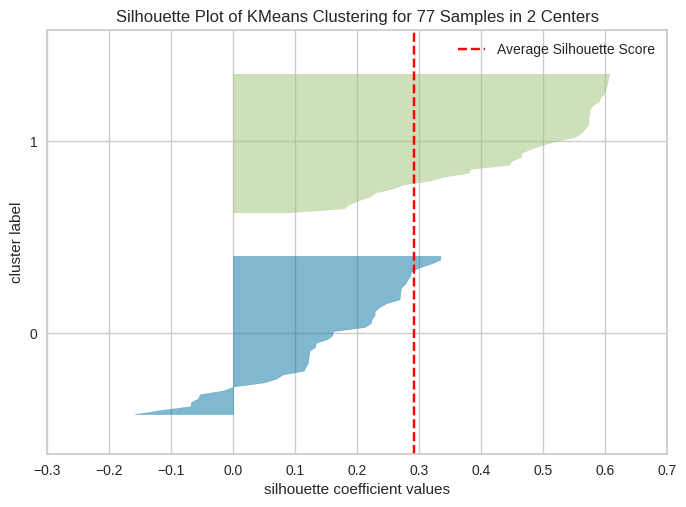

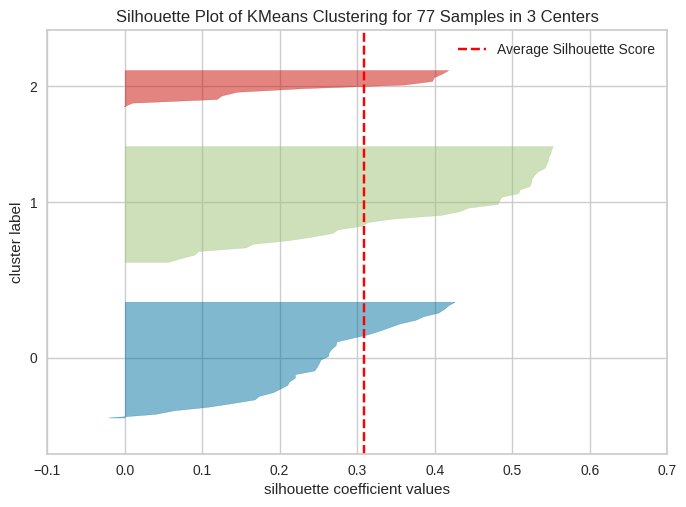

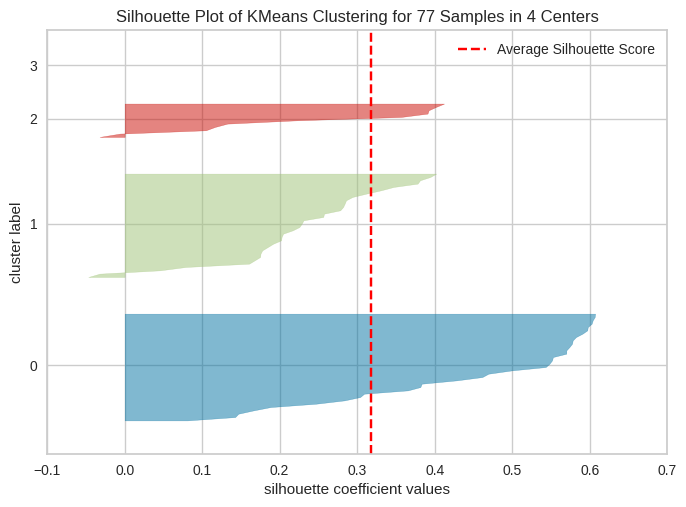

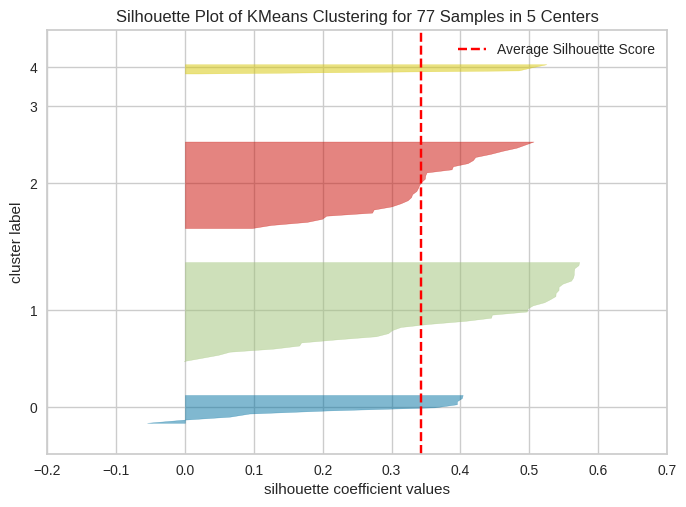

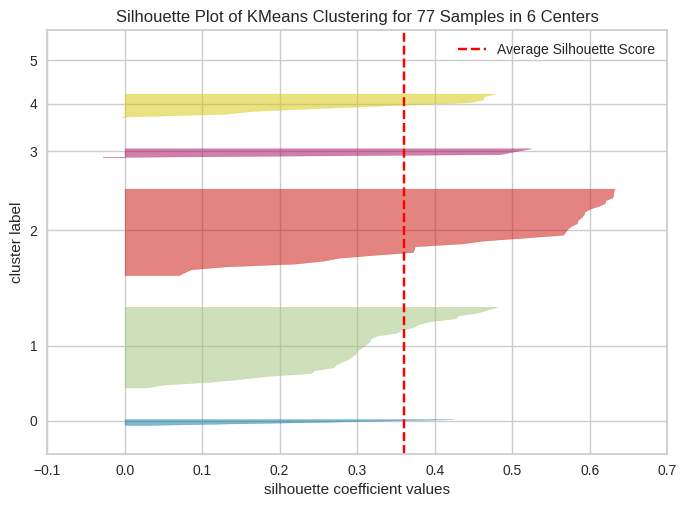

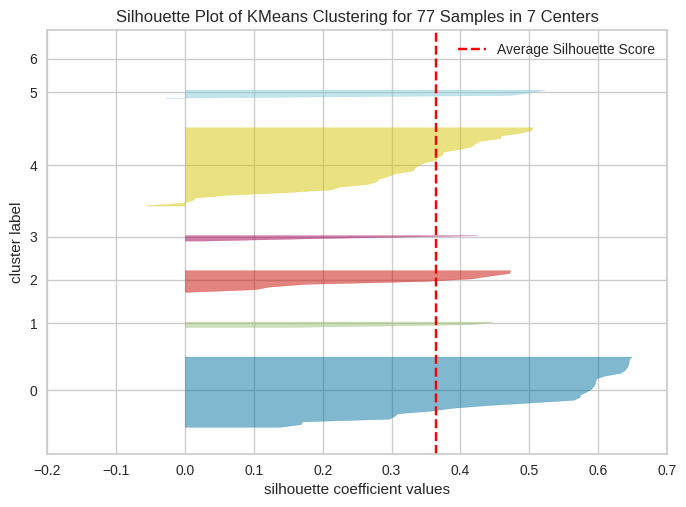

In [24]:
for i in range(2,8):

  km = KMeans(n_clusters=i,
              random_state=42)

  visualizer = SilhouetteVisualizer(km,
                                    colors='yellowbrick')

  visualizer.fit(df_abt_soma)
  visualizer.show()

Escolhendo um ponto de corte / Número fixo de grupos

In [25]:
km = KMeans(n_clusters=6, random_state=42)

abt_soma['km_06'] = km.fit_predict(df_abt_soma)

In [26]:
abt_soma

,DividendYield,P_Ativos,P_L,P_VP,ROA,ROE,ROIC,ValorDeMercado,km_06
ticker,,,,,,,,,
ABEV3,1.399657,111.954883,932.165580,182.798249,4.857191,8.183049,9.539780,1.059989e+13,3
ALPA4,1.305147,107.148964,1520.728375,183.166883,3.572114,6.112321,5.759972,4.643210e+11,4
AMER3,0.101826,1.929388,394.362780,5.572092,-0.684535,-2.049594,-0.573632,8.517271e+10,2
ASAI3,0.080081,7.501928,189.925600,73.122461,0.487118,4.783805,1.973406,2.316929e+11,2
B3SA3,0.956840,43.131966,584.701755,83.796368,1.847317,3.736935,2.536745,1.938318e+12,2
...,...,...,...,...,...,...,...,...,...
VALE3,3.226883,35.965801,1592.681964,75.965779,3.477220,7.156289,7.938348,1.297817e+13,3
VBBR3,0.450342,8.805712,207.845399,26.591769,0.391940,1.179138,0.772738,1.697056e+11,2
VIVT3,3.738691,32.674737,669.764067,51.419626,2.532100,3.974503,3.786052,3.981713e+12,1


In [27]:
abt_soma['km_06'].value_counts()

2    31
1    29
4     9
3     4
0     3
5     1
Name: km_06, dtype: int64

In [28]:
abt_soma[abt_soma['km_06'] == 5]

,DividendYield,P_Ativos,P_L,P_VP,ROA,ROE,ROIC,ValorDeMercado,km_06
ticker,,,,,,,,,
LWSA3,0.019847,25.890345,33768.684021,42.502839,0.025641,0.047146,0.099931,9.110924e+10,5


In [29]:
abt_soma[abt_soma['km_06'] == 3]

,DividendYield,P_Ativos,P_L,P_VP,ROA,ROE,ROIC,ValorDeMercado,km_06
ticker,,,,,,,,,
ABEV3,1.399657,111.954883,932.165580,182.798249,4.857191,8.183049,9.539780,1.059989e+13,3
PETR3,4.001336,17.398329,-88.081750,44.907039,1.956050,4.467268,4.404518,1.405509e+13,3
PETR4,4.796157,16.379375,-83.005928,42.178943,1.956050,4.467268,4.404518,1.405509e+13,3
VALE3,3.226883,35.965801,1592.681964,75.965779,3.477220,7.156289,7.938348,1.297817e+13,3


In [30]:
abt_soma[abt_soma['km_06'] == 4]

,DividendYield,P_Ativos,P_L,P_VP,ROA,ROE,ROIC,ValorDeMercado,km_06
ticker,,,,,,,,,
ALPA4,1.305147,107.148964,1520.728375,183.166883,3.572114,6.112321,5.759972,4.643210e+11,4
CCRO3,1.998908,63.848060,1389.524200,264.188881,2.839898,11.488294,6.659229,1.430503e+12,4
CIEL3,3.037356,107.762764,372.588326,398.317124,6.311308,24.365305,11.823981,1.966552e+12,4
LREN3,1.081565,118.651704,2237.390071,289.772588,4.308198,11.234930,7.066332,9.660347e+11,4
MGLU3,0.465810,133.258945,3557.361121,507.919935,1.003332,4.354983,7.817872,2.484844e+12,4
RADL3,0.401712,129.308110,2534.482733,295.898351,2.634631,6.060421,6.491348,1.111093e+12,4
RENT3,0.861982,74.860899,1345.410209,249.141752,3.087174,10.206595,5.676291,1.104698e+12,4
TOTS3,0.869666,140.662831,2256.874565,262.985485,4.059674,7.570417,5.971223,4.874002e+11,4
WEGE3,1.006508,169.806482,1609.866638,328.429150,5.181665,10.502669,6.883825,3.218333e+12,4


In [31]:
df_abt_soma

,DividendYield,P_Ativos,P_L,P_VP,ROA,ROE,ROIC,ValorDeMercado
ticker,,,,,,,,
ABEV3,-0.043995,2.094059,-0.032476,0.737815,1.763010,0.715704,2.243072,3.240215
ALPA4,-0.121612,1.960557,0.118173,0.741336,1.032588,0.393724,0.749711,-0.347280
AMER3,-1.109836,-0.962309,-0.170133,-0.954614,-1.386842,-0.875382,-1.752629,-0.481480
ASAI3,-1.127694,-0.807511,-0.222461,-0.309539,-0.720888,0.187151,-0.746321,-0.429619
B3SA3,-0.407658,0.182246,-0.121413,-0.207608,0.052233,0.024372,-0.523752,0.174443
...,...,...,...,...,...,...,...,...
VALE3,1.456609,-0.016821,0.136590,-0.282386,0.978651,0.556052,1.610364,4.082009
VBBR3,-0.823618,-0.771294,-0.217874,-0.753886,-0.774986,-0.373343,-1.220692,-0.451559
VIVT3,1.876929,-0.108243,-0.099641,-0.516791,0.441456,0.061312,-0.030165,0.897705
